<a href="https://colab.research.google.com/github/phanloc1622/BTVNAI_PHANXUANLOC_18146171/blob/main/CNN_NHANDIENKHUONMAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install bing-image-downloader

In [4]:
from bing_image_downloader import downloader
downloader.download("Sơn Tùng MTP",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Khuonmat/Train/SonTungMTP')
downloader.download("Hà Anh Tuấn",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Khuonmat/Train/HaAnhTuan')
downloader.download("Bùi Anh Tuấn",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Khuonmat/Train/BuiAnhTuan')
downloader.download("Hoài Lâm",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Khuonmat/Train/HoaiLam')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/Khuonmat/Train/SonTungMTP/Sơn Tùng MTP


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://yt3.ggpht.com/a-/AN66SAx08GJ2TWNT-VjkRdjERvbaz7Qb0CEDIsJHbA=s900-mo-c-c0xffffffff-rj-k-no
[%] File Downloaded !

[%] Downloading Image #2 from https://reviewdao.vn/wp-content/uploads/2020/12/tim-hieu-ve-ca-nhac-si-son-tung-mtp.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/64/42/56/6442560def6b637fe0c265f218adfa92.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/96/89/77/968977212c248fdc356dfa45abb2d072.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://yt3.ggpht.com/a/AATXAJw9NCNytgMKChpwG_9tokZNKHIpdy-N_x57fZ_f=s900-c-k-c0xffffffff-no-rj-mo
[%] File Downloaded !

[%] Downloading Image #6 from https://1.bp.blogspot.com/-K7LUFHBMv20/XSFjKdlf-MI/AAAAAAAANuI/zN76IdN-CRQ2-3gdGAxnTvl0745MIqf7wCLcBGAs/s160

In [5]:
from bing_image_downloader import downloader
downloader.download("Sơn Tùng MTP",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Khuonmat/Test/SonTungMTP')
downloader.download("Hà Anh Tuấn",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Khuonmat/Test/HaAnhTuan')
downloader.download("Bùi Anh Tuấn",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Khuonmat/Test/BuiAnhTuan')
downloader.download("Hoài Lâm",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Khuonmat/Test/HoaiLam')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/Khuonmat/Test/SonTungMTP/Sơn Tùng MTP


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://yt3.ggpht.com/a-/AN66SAx08GJ2TWNT-VjkRdjERvbaz7Qb0CEDIsJHbA=s900-mo-c-c0xffffffff-rj-k-no
[%] File Downloaded !

[%] Downloading Image #2 from https://yt3.ggpht.com/a/AATXAJw9NCNytgMKChpwG_9tokZNKHIpdy-N_x57fZ_f=s900-c-k-c0xffffffff-no-rj-mo
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/64/42/56/6442560def6b637fe0c265f218adfa92.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://1.bp.blogspot.com/-K7LUFHBMv20/XSFjKdlf-MI/AAAAAAAANuI/zN76IdN-CRQ2-3gdGAxnTvl0745MIqf7wCLcBGAs/s1600/bo-hinh-nen-son-tung-mtp-cute-dep-nhat-cho-dien-thoai-trong-mv-hay-trao-cho-anh-7.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/96/89/77/968977212c248fdc356dfa45abb2d072.jpg
[%] File Downloaded !

[%] Downloading Image #6 f

In [6]:
from bing_image_downloader import downloader
downloader.download("Sơn Tùng MTP",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Khuonmat/Validation/SonTungMTP')
downloader.download("Hà Anh Tuấn",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Khuonmat/Validation/HaAnhTuan')
downloader.download("Bùi Anh Tuấn",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Khuonmat/Validation/BuiAnhTuan')
downloader.download("Hoài Lâm",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Khuonmat/Validation/HoaiLam')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/Khuonmat/Validation/SonTungMTP/Sơn Tùng MTP


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://yt3.ggpht.com/a-/AN66SAx08GJ2TWNT-VjkRdjERvbaz7Qb0CEDIsJHbA=s900-mo-c-c0xffffffff-rj-k-no
[%] File Downloaded !

[%] Downloading Image #2 from https://1.bp.blogspot.com/-K7LUFHBMv20/XSFjKdlf-MI/AAAAAAAANuI/zN76IdN-CRQ2-3gdGAxnTvl0745MIqf7wCLcBGAs/s1600/bo-hinh-nen-son-tung-mtp-cute-dep-nhat-cho-dien-thoai-trong-mv-hay-trao-cho-anh-7.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/96/89/77/968977212c248fdc356dfa45abb2d072.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/64/42/56/6442560def6b637fe0c265f218adfa92.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://reviewdao.vn/wp-content/uploads/2020/12/tim-hieu-ve-ca-nhac-si-son-tung-mtp.jpg
[%] File Downloaded !

[%] Downloading Image #6 from h

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Khuonmat/Train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Khuonmat/Validation',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 80 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [21]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [22]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Khuonmat/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 80 images belonging to 4 classes.


In [23]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Khuonmat/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 40 images belonging to 4 classes.


In [24]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 43808)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [25]:
training_data.class_indices

{'BuiAnhTuan': 0, 'HaAnhTuan': 1, 'HoaiLam': 2, 'SonTungMTP': 3}

In [26]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [28]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
3/3 [==============================] - 10s 3s/step - loss: 3.0293 - accuracy: 0.2875 - val_loss: 1.3675 - val_accuracy: 0.3500
Epoch 2/100
3/3 [==============================] - 11s 3s/step - loss: 1.3684 - accuracy: 0.3875 - val_loss: 1.3788 - val_accuracy: 0.3000
Epoch 3/100
3/3 [==============================] - 10s 3s/step - loss: 1.3636 - accuracy: 0.4125 - val_loss: 1.3629 - val_accuracy: 0.3000
Epoch 4/100
3/3 [==============================] - 10s 3s/step - loss: 1.3487 - accuracy: 0.3500 - val_loss: 1.3164 - val_accuracy: 0.3500
Epoch 5/100
3/3 [==============================] - 11s 3s/step - loss: 1.3102 - accuracy: 0.4375 - val_loss: 1.2419 - val_accuracy: 0.6750
Epoch 6/100
3/3 [==============================] - 10s 4s/step - loss: 1.1991 - accuracy: 0.5125 - val_loss: 1.1274 - val_accuracy: 0.4750
Epoch 7/100
3/3 [==============================] - 10s 4s/step - loss: 1.1071 - accuracy: 0.5500 - val_loss: 1.0691 - val_accuracy: 0.6250
Epoch 8/100
3/3 [==========

Sai số kiểm tra là:  0.10644292831420898
Độ chính xác kiểm tra là:  0.949999988079071


<function matplotlib.pyplot.show>

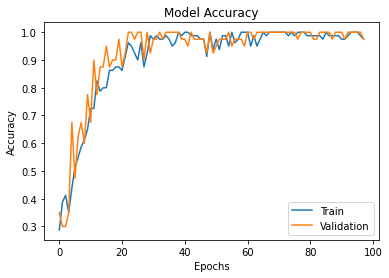

In [29]:
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [30]:
model.save("/content/drive/MyDrive/Colab Notebooks/Khuonmat/nhandienkhuonmat.h5")

In [31]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/Khuonmat/nhandienkhuonmat.h5')

Bùi Anh Tuấn


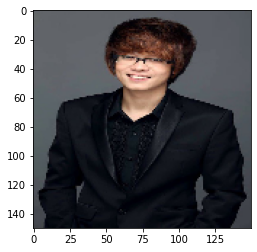

In [33]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Khuonmat/Test/BuiAnhTuan/Bùi Anh Tuấn/Image_2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Bùi Anh Tuấn'
if round(result[0][1])==1:
  prediction='Hà Anh Tuấn'
if round(result[0][2])==1:
  prediction='Hoài Lâm'
if round(result[0][3])==1:
  prediction='Sơn Tùng MTP'
print(prediction)

Hà Anh Tuấn


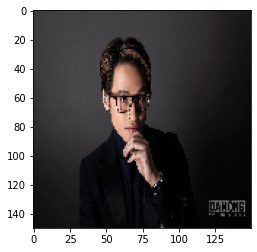

In [35]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Khuonmat/Test/HaAnhTuan/Hà Anh Tuấn/Image_4.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Bùi Anh Tuấn'
if round(result[0][1])==1:
  prediction='Hà Anh Tuấn'
if round(result[0][2])==1:
  prediction='Hoài Lâm'
if round(result[0][3])==1:
  prediction='Sơn Tùng MTP'
print(prediction)

Hoài Lâm


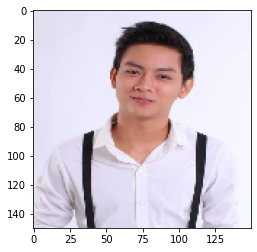

In [37]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Khuonmat/Test/HoaiLam/Hoài Lâm/Image_2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Bùi Anh Tuấn'
if round(result[0][1])==1:
  prediction='Hà Anh Tuấn'
if round(result[0][2])==1:
  prediction='Hoài Lâm'
if round(result[0][3])==1:
  prediction='Sơn Tùng MTP'
print(prediction)

Sơn Tùng MTP


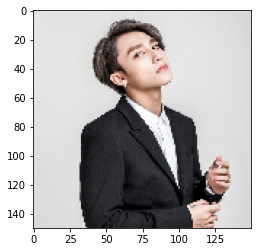

In [38]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Khuonmat/Test/SonTungMTP/Sơn Tùng MTP/Image_6.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Bùi Anh Tuấn'
if round(result[0][1])==1:
  prediction='Hà Anh Tuấn'
if round(result[0][2])==1:
  prediction='Hoài Lâm'
if round(result[0][3])==1:
  prediction='Sơn Tùng MTP'
print(prediction)